In [1]:
# No time to comments, just call me impromptu and I will explain every part of the code
# I am very sorry for the no comments but SRM professors literally don't have chill

In [2]:
import numpy as np                                                          
import pandas as pd                                                     
import matplotlib.pyplot as plt                                         
import seaborn as sns                                                   
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dataset = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
df = dataset.copy()
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              181691 non-null  int64  
 1   Month             181691 non-null  int64  
 2   Day               181691 non-null  int64  
 3   Extended          181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   Region            181691 non-null  object 
 6   City              181257 non-null  object 
 7   Success           181691 non-null  int64  
 8   Suicide           181691 non-null  int64  
 9   Attack_Type       181691 non-null  object 
 10  Target_Type       181691 non-null  object 
 11  Attack_Group      181691 non-null  object 
 12  Weapon            181691 non-null  object 
 13  Number_of_Killed  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


In [6]:
df.describe()

,Year,Month,Day,Extended,Success,Suicide,Number_of_Killed
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,2.403272
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,11.545741
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [7]:
format(df.shape[0])

'181691'

In [8]:
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(df)

,Total,Percent
Number_of_Killed,10313,0.056761
City,434,0.002389
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Extended,0,0.000000
Country,0,0.000000
Region,0,0.000000
Success,0,0.000000
Suicide,0,0.000000


In [9]:
df["City"].fillna("Unknown", inplace = True) 
df["Number_of_Killed"].fillna(0, inplace = True) 

In [10]:
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dub = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dub

check_duplicate(df)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,165984,15707,91.355103,8.644897


In [11]:
df.drop_duplicates(inplace=True)

NameError: name 'Text' is not defined

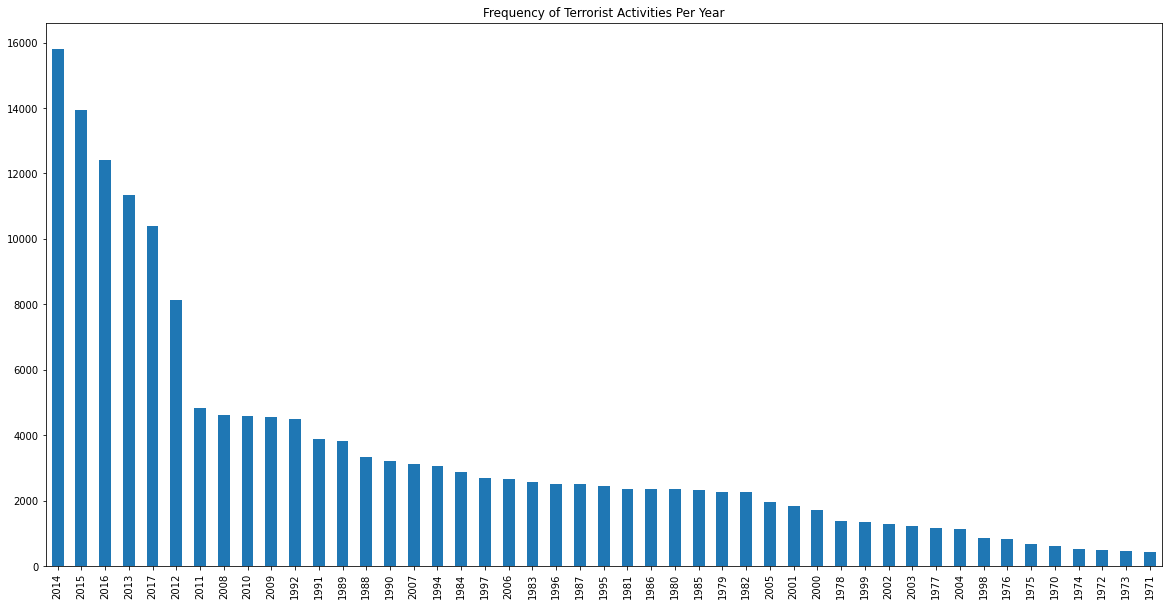

In [12]:
df['Year'].value_counts().plot(kind='bar',figsize=[20,10])
plt.title('Frequency of Terrorist Activities Per Year')
Text(0.5, 1.0, 'Frequency of Terrorist Activities Per Year')

NameError: name 'Text' is not defined

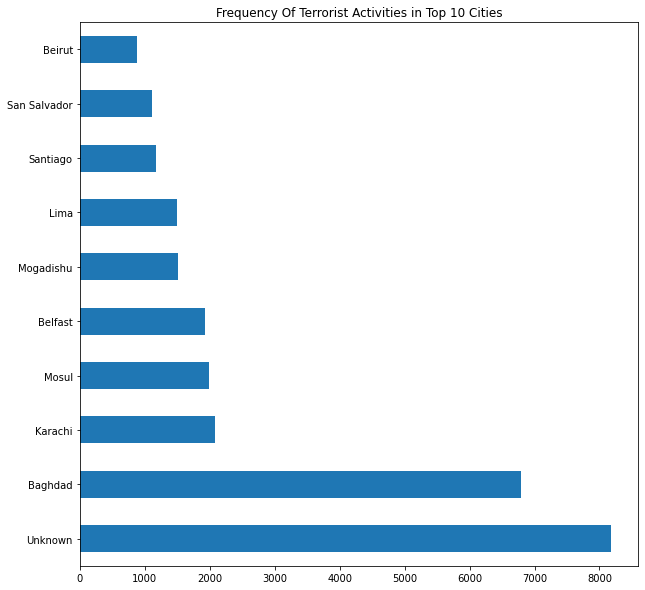

In [13]:
df['City'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Frequency Of Terrorist Activities in Top 10 Cities')
Text(0.5, 1.0, 'Frequency Of Terrorist Activities in Top 10 Cities')

NameError: name 'Text' is not defined

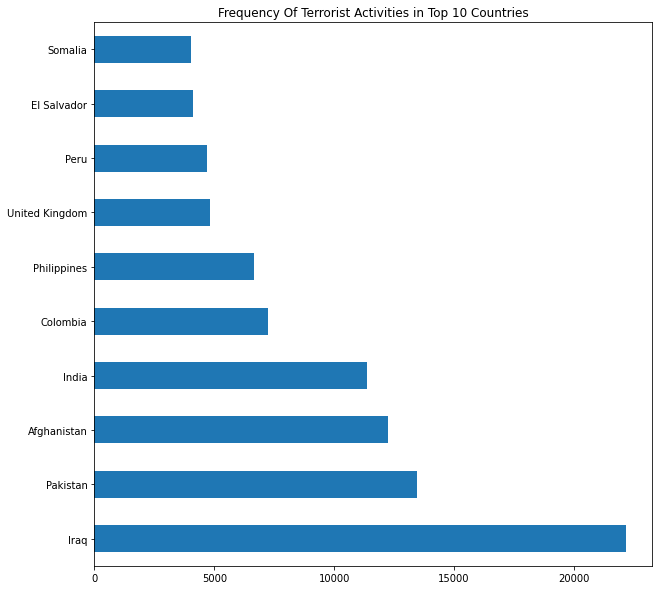

In [14]:
df['Country'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Frequency Of Terrorist Activities in Top 10 Countries')
Text(0.5, 1.0, 'Frequency Of Terrorist Activities in Top 10 Countries')

NameError: name 'Text' is not defined

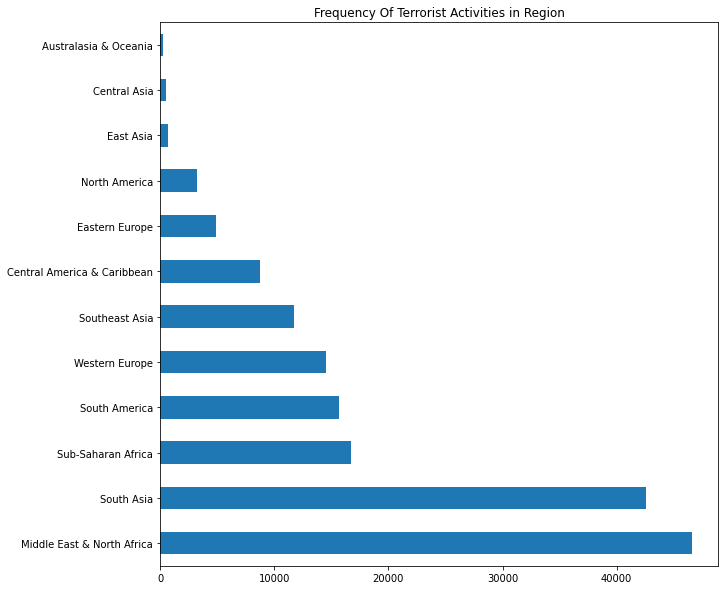

In [15]:
df['Region'].value_counts().plot(kind='barh',figsize=[10,10])
plt.title('Frequency Of Terrorist Activities in Region')
Text(0.5, 1.0, 'Frequency Of Terrorist Activities in Region')

NameError: name 'Text' is not defined

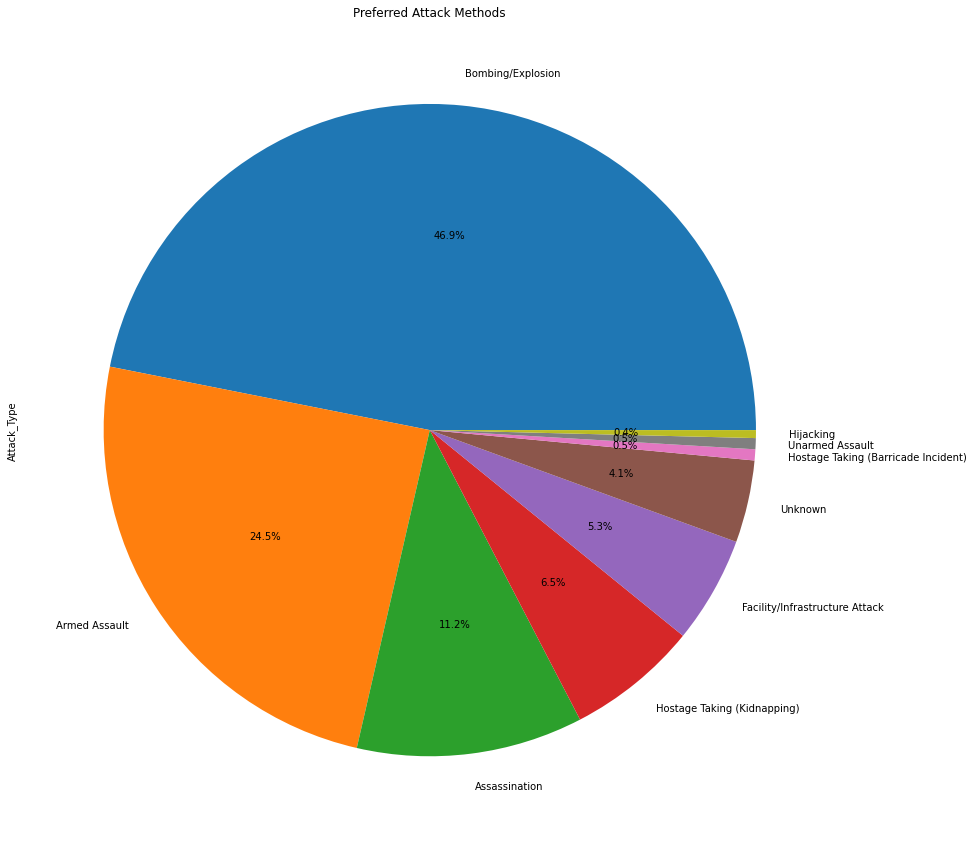

In [16]:
df['Attack_Type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.title("Preferred Attack Methods")
Text(0.5, 1.0, 'Preferred Attack Methods')

NameError: name 'Text' is not defined

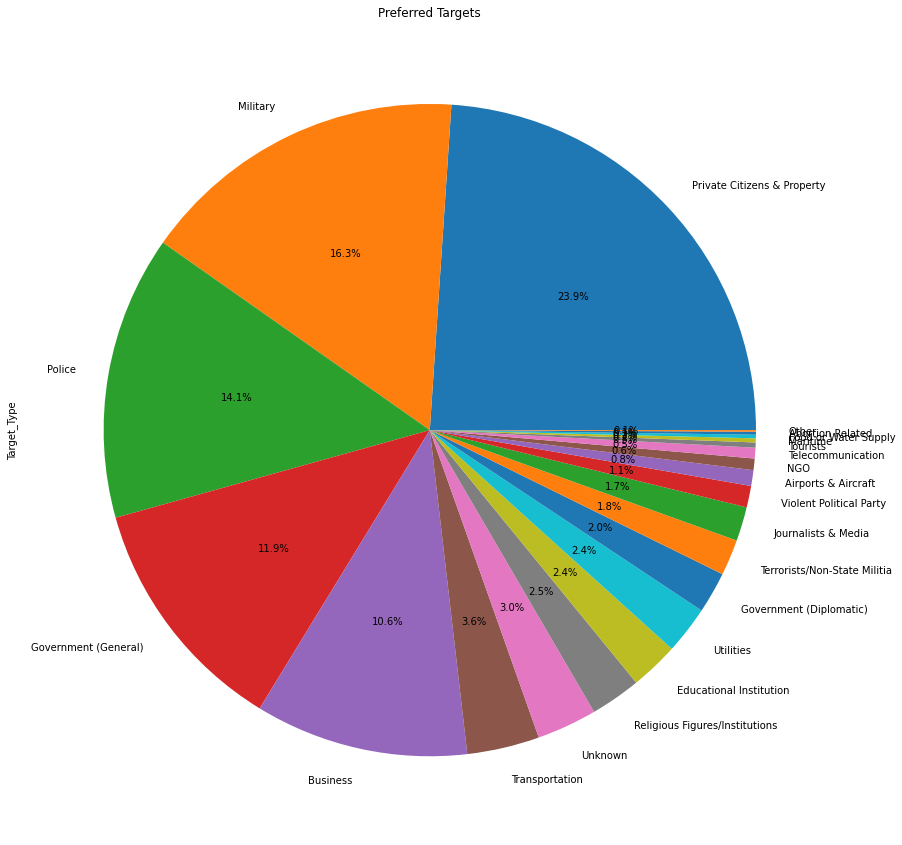

In [17]:
df['Target_Type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.title('Preferred Targets')
Text(0.5, 1.0, 'Preferred Targets')

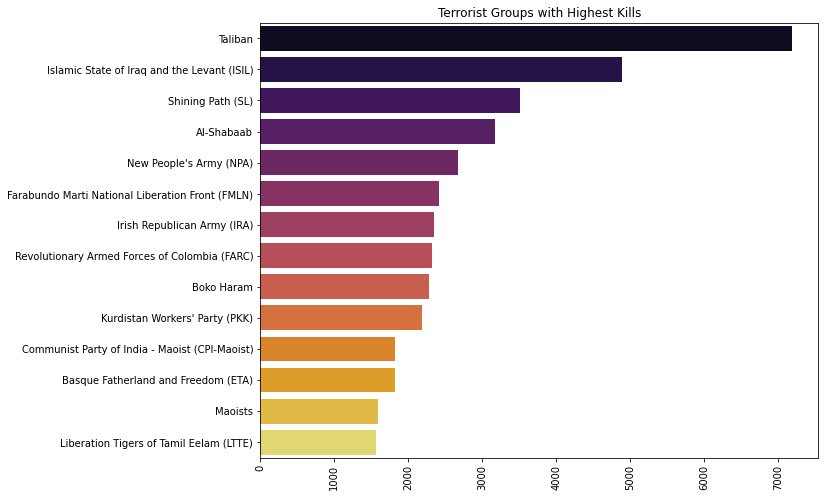

In [18]:
sns.barplot(df['Attack_Group'].value_counts()[1:15].values,df['Attack_Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Kills')
plt.show()


<AxesSubplot:ylabel='Weapon'>

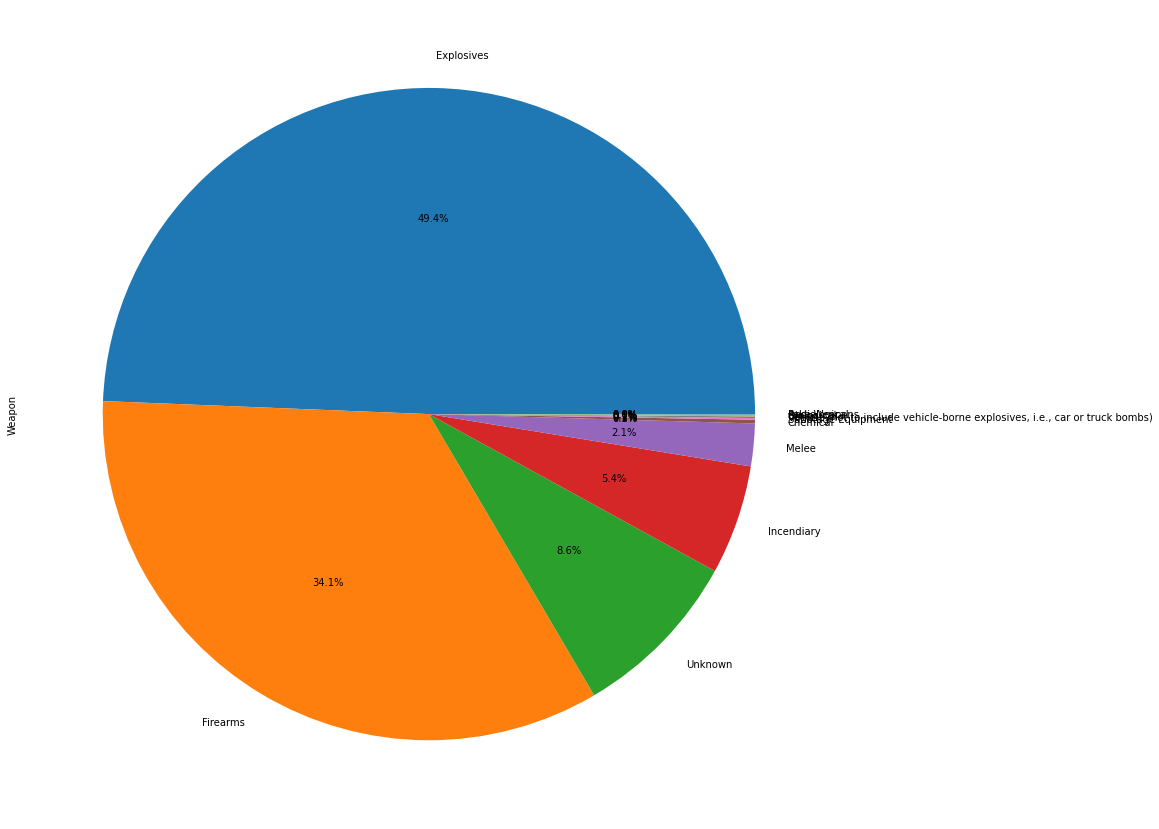

In [19]:
df['Weapon'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')

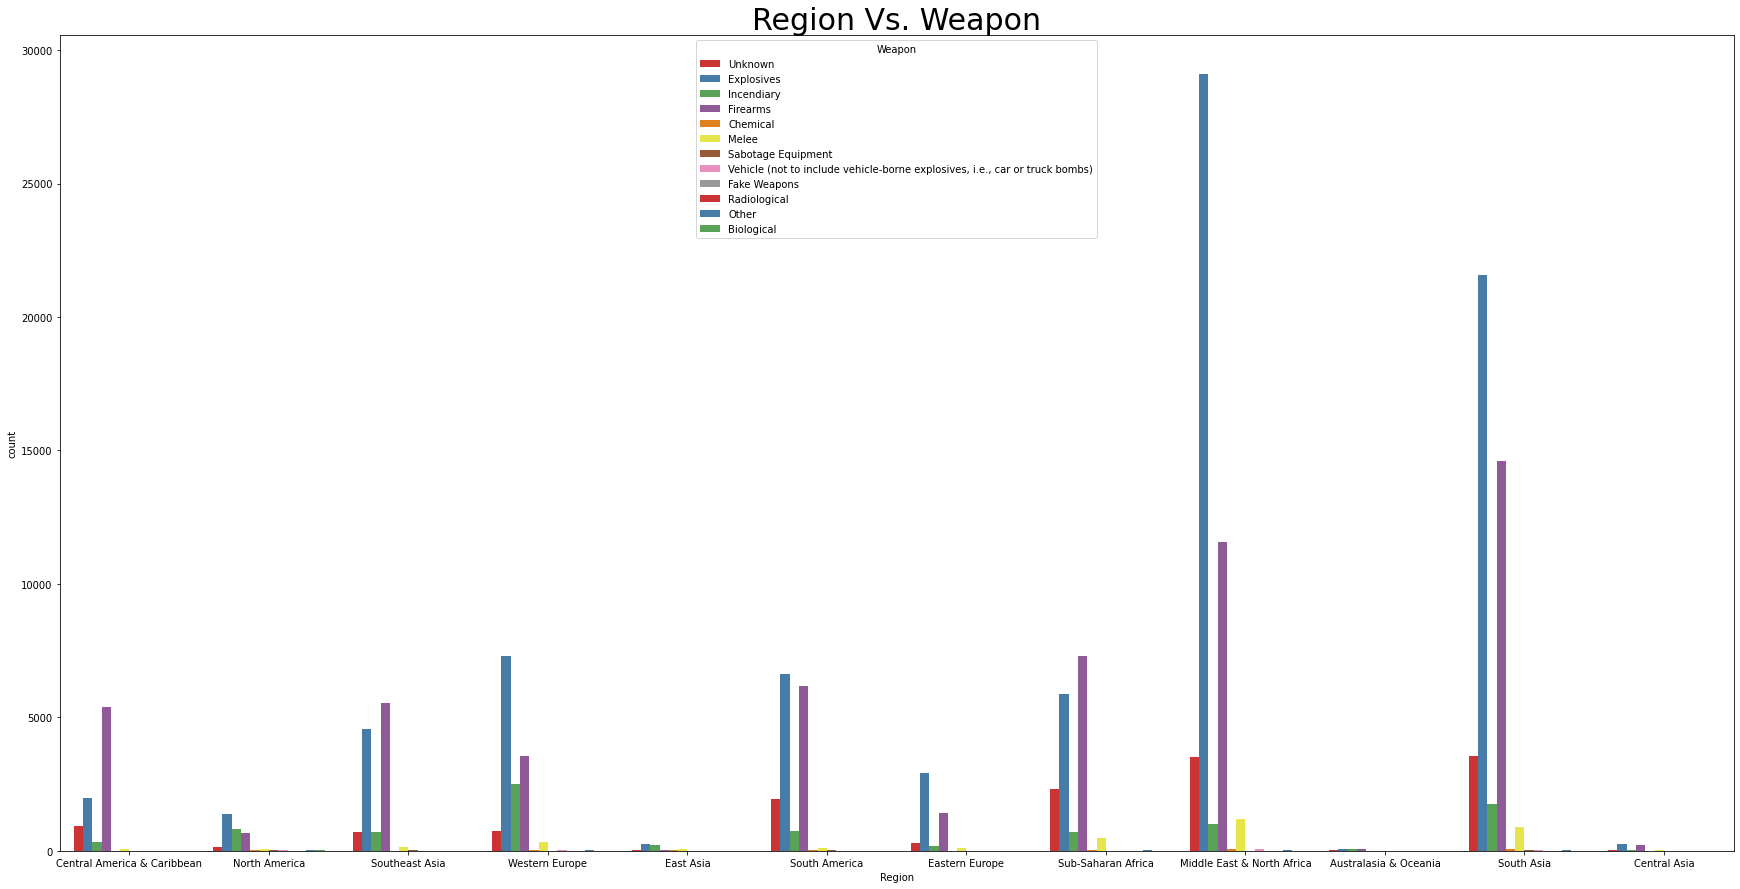

In [20]:
plt.subplots(figsize = (30,15))
sns.countplot(x="Region", hue ='Weapon', data = df,palette = "Set1")
plt.title('Region Vs. Weapon', fontsize = 30)
plt.show()

ValueError: Could not interpret input 'Attack Group'

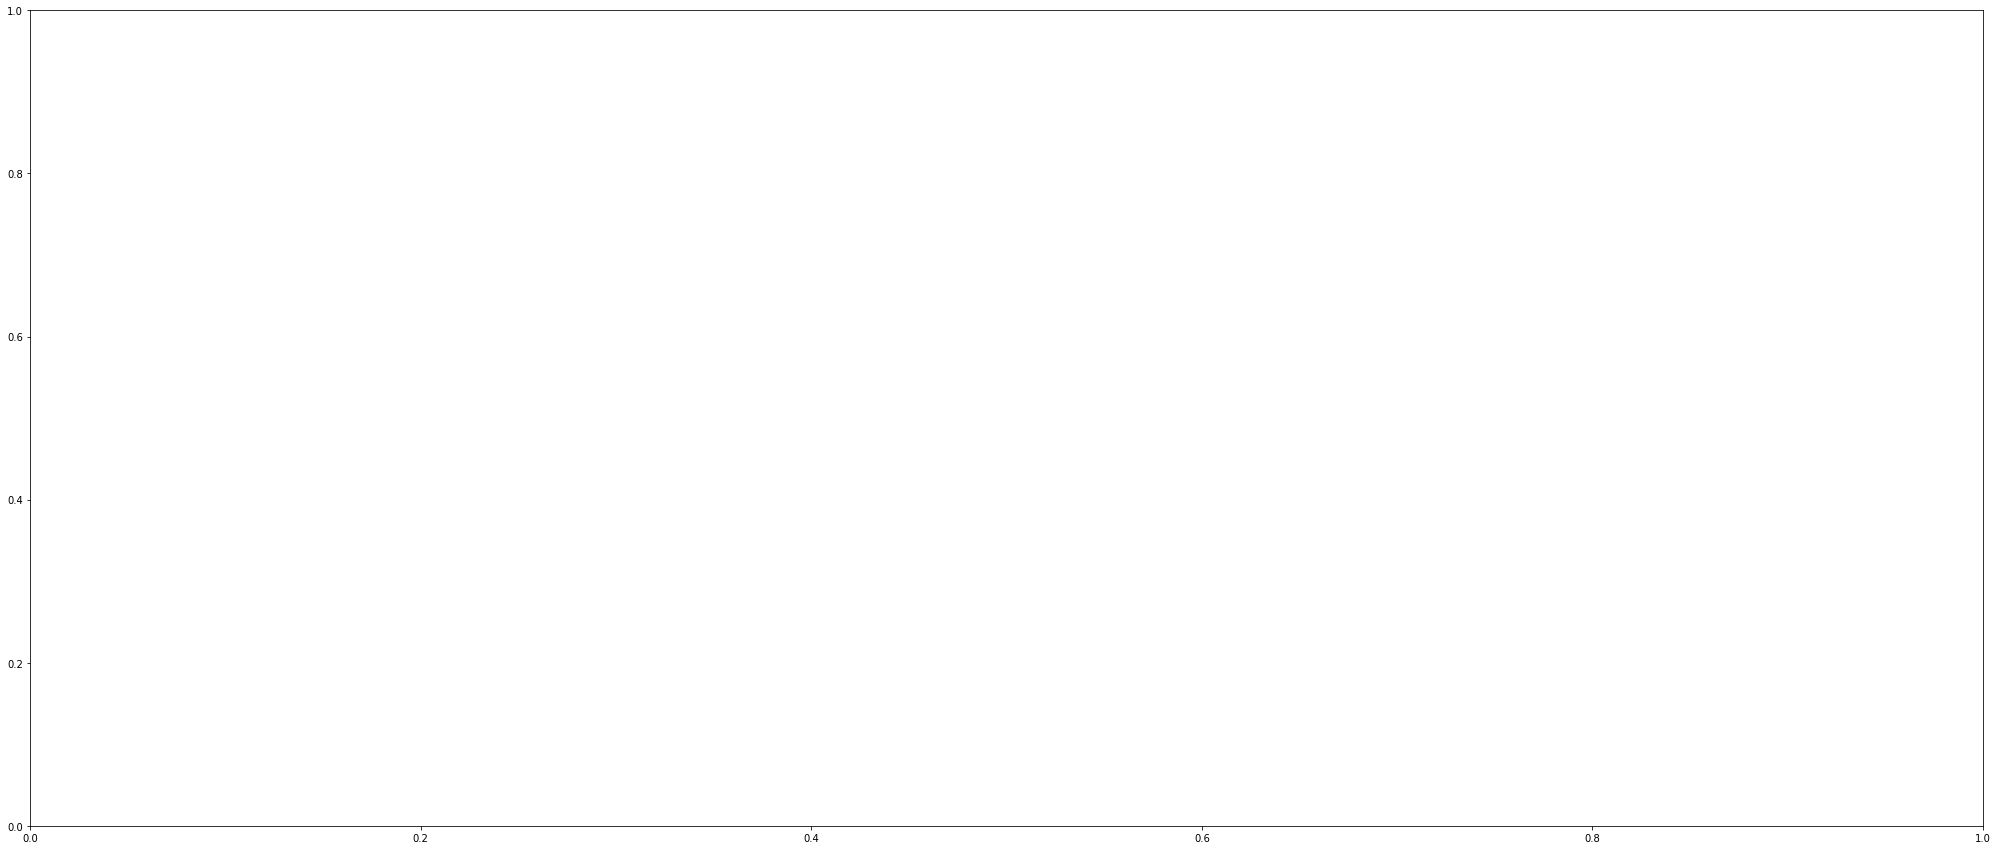

In [21]:
plt.subplots(figsize = (35,15))
Top_10_Group = df['Attack_Group'].value_counts().index.tolist()[0:10]
snap = df[['Attack_Group','Weapon']]
AttackG_Weapon = snap[snap['Attack_Group'].isin(Top_10_Group)]
sns.countplot(x='Attack Group', hue ='Weapon', data = AttackG_Weapon,palette = "Set1")
plt.title('Attack Group Vs. Weapon', fontsize = 30)
plt.show()


1    147388
0     18596
Name: Success, dtype: int64


Text(0.5, 1.0, 'Successful terrorist operations')

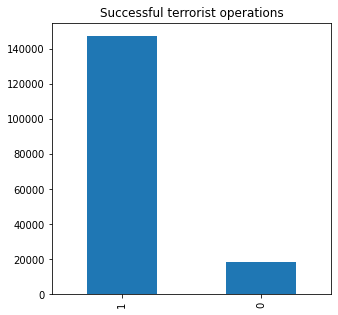

In [22]:
df['Success'].value_counts().plot(kind='bar',figsize=[5,5])
print(df['Success'].value_counts())
plt.title("Successful terrorist operations")

0    159507
1      6477
Name: Suicide, dtype: int64


Text(0.5, 1.0, 'Suicide terrorist ops')

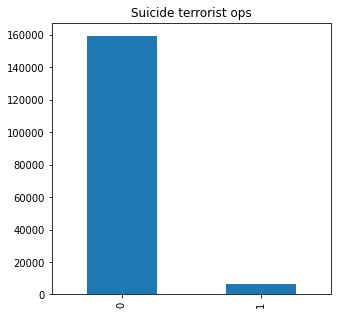

In [23]:
df['Suicide'].value_counts().plot(kind='bar',figsize=[5,5])
print(df['Suicide'].value_counts())
plt.title("Suicide terrorist ops")

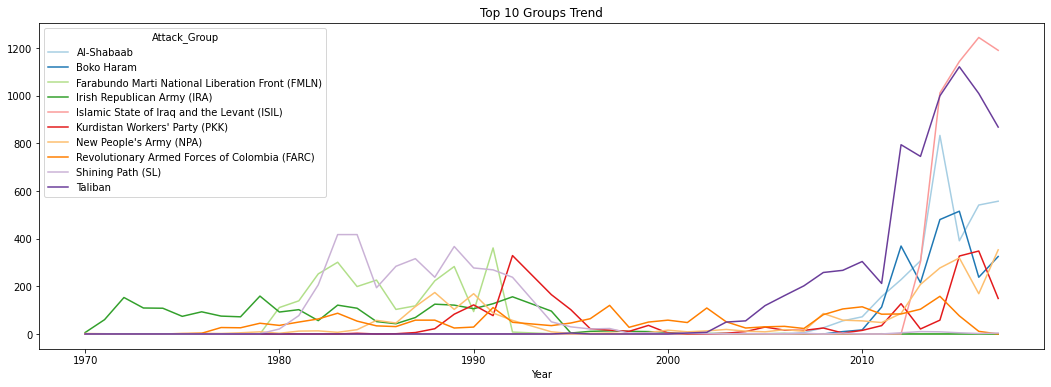

In [24]:
top_groups10=df[df['Attack_Group'].isin(df['Attack_Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Attack_Group).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups Trend")
plt.show()
